### Description


#### Context

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

#### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

#### Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

#### Data Dictionary

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  # Pairwise distribution between data points

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_excel("Credit Card Customer Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
data.shape

(660, 7)

<IPython.core.display.Javascript object>

- The dataset has 600 rows and 7 columns

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


<IPython.core.display.Javascript object>

In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

In [7]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.000,330.500,190.670,1.000,165.750,330.500,495.250,660.000
Customer Key,660.000,55141.444,25627.772,11265.000,33825.250,53874.500,77202.500,99843.000
Avg_Credit_Limit,660.000,34574.242,37625.488,3000.000,10000.000,18000.000,48000.000,200000.000
Total_Credit_Cards,660.000,4.706,2.168,1.000,3.000,5.000,6.000,10.000
Total_visits_bank,660.000,2.403,1.632,0.000,1.000,2.000,4.000,5.000
Total_visits_online,660.000,2.606,2.936,0.000,1.000,2.000,4.000,15.000
Total_calls_made,660.000,3.583,2.865,0.000,1.000,3.000,5.000,10.000


<IPython.core.display.Javascript object>

- The average credit card limit is 34754
- The average Total credit cards is between 4-5 per holder.
- The average Total visits to the bank is between 2-3 times per customer.
- The average Total visits to online is between 2-3 times per customer.
- The average Total calls made is between 3-4 times per customer.

In [9]:
# checking for missing values
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# Let's see unique values
cols = df.columns

for col in cols:
    print("Unique values in the column '{}' are \n\n".format(col), df[col].unique())
    print("-" * 100)

Unique values in the column 'Sl_No' are 

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236

<IPython.core.display.Javascript object>

- Sl_No seems to be a serial number so should be dropped.

In [11]:
print(df.nunique())

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64


<IPython.core.display.Javascript object>

- Customer key is suggesting 5 duplicates since only have 655 out of 660
- Sl_No is going to be dropped.

In [12]:
for k in list(
    df.loc[df["Customer Key"].duplicated(keep=False), "Customer Key"].unique()
):
    display(df.loc[df["Customer Key"] == k])

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


<IPython.core.display.Javascript object>

- There 5 customer key duplicated, however, the info is completely different from eachother, so they wont be dropped. 

In [13]:
# dropping the serial no. column as it does not provide any information
df.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
df.drop("Customer Key", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### EDA

### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

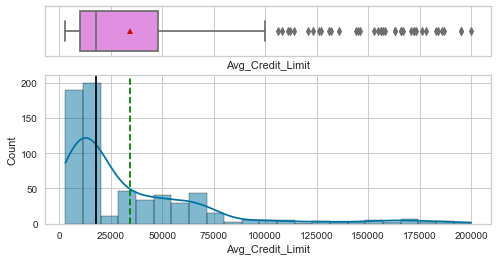

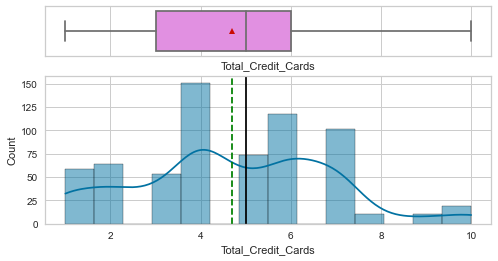

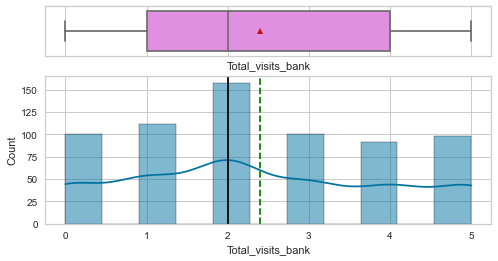

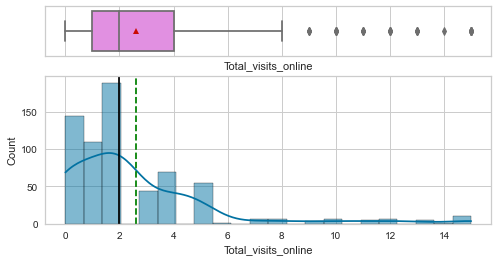

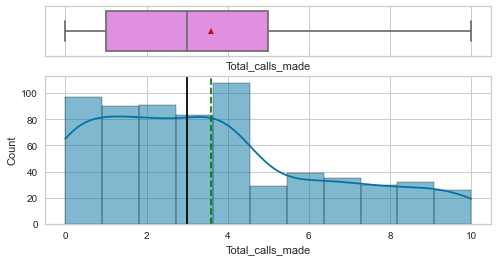

<IPython.core.display.Javascript object>

In [16]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item, kde=True, figsize=(8, 4))

#### Observations

- Average Credit Limit, Total visits online, Total calls made are right-skewed.
- Average Credit Limit, aprox 66% of the customer are below the media (18K), the graph shows outliers after 100K. wont be dropped because it is real market trend.
- Total credit cards, tends to be normal disctribution, however it shows a slightly by bimodal on 4 and 6 credit cards.
- Total visits bank, tends to be normal distribution.
- Total visits online, aprox 66 % of the people just check 2 or less times the website. Boxplot shows some outliers after the 8 visits.
- Total calls made, most of the people made less or equal to 4 calls yearly.

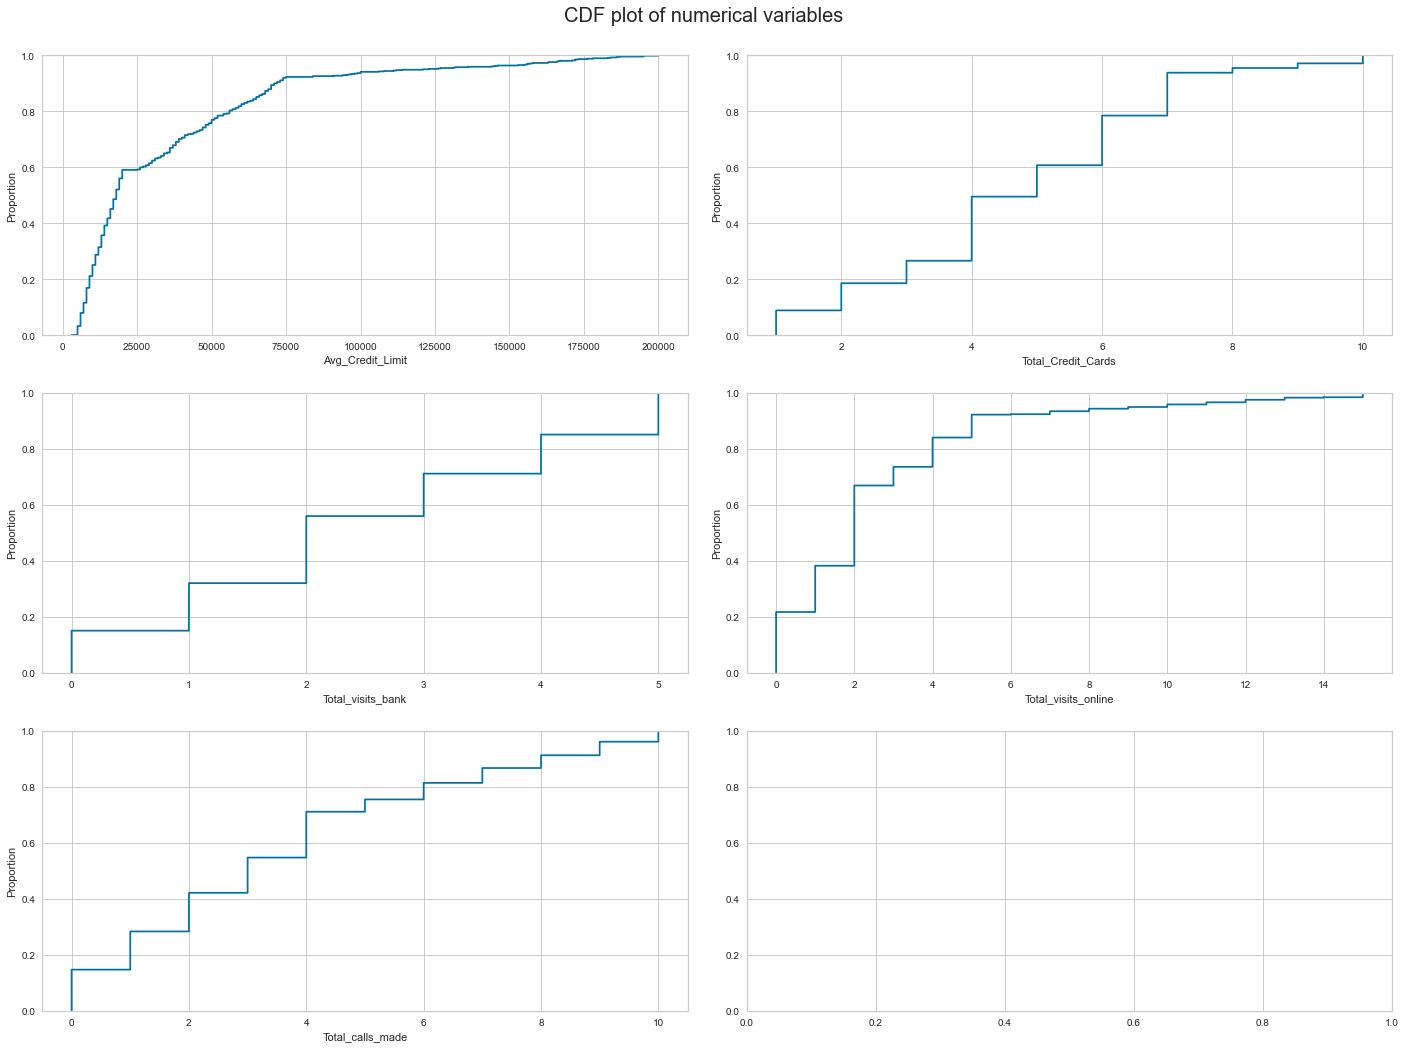

<IPython.core.display.Javascript object>

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

#### Observations

- 60% of the average credit limit is equal or less than 25000. Outliers (more than 100000) are around 5% of the data.
- 95% of the customers have 8 or less credit cards.
- 70% of the customers go to the bank at least 3 times a year or less.
- 90% of the customers visit the website 5 times or less.
- 90% of the customer at least made 8 calls to the bank a year or less.

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

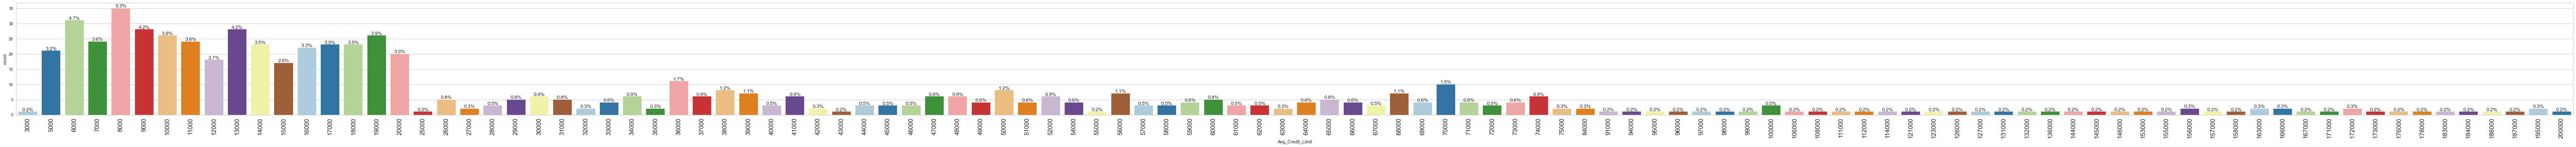

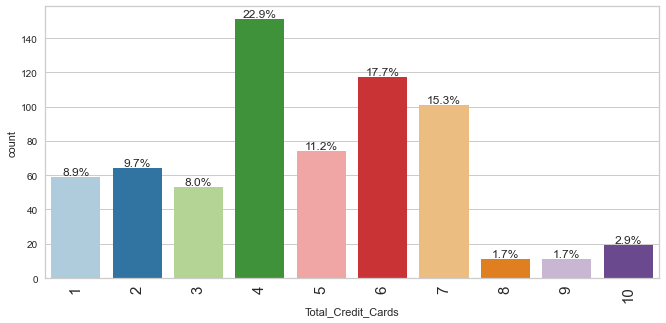

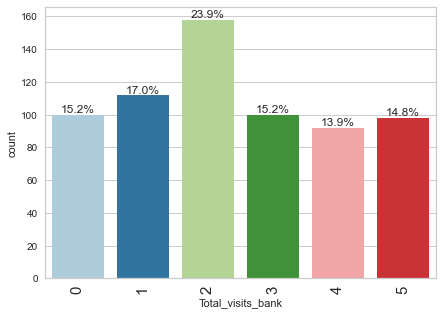

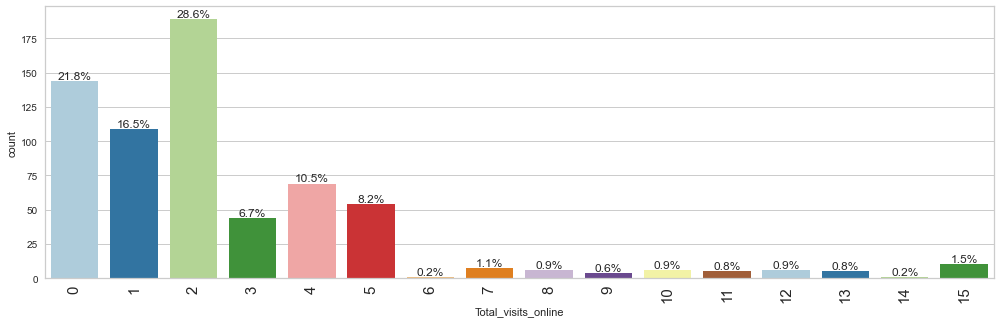

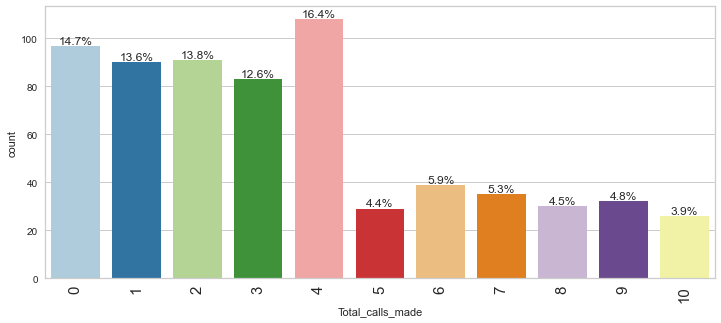

<IPython.core.display.Javascript object>

In [19]:
for item in num_col:
    labeled_barplot(df, item, perc=True)

#### Observations: 

- 5.3% (which is the highest) around 35 customers have a credit limit of 8K.
- 22.9% have 4 credit cards.
- 23.9% make 2 visits to the the bank yearly while 15.2% never visit it.
- 28.6%  visit the website twice a year, while 21.8% never visit the site.
- 16.4% make 4 calls yearly while 14.7% never call the bank.

### Bivariate Analsysis

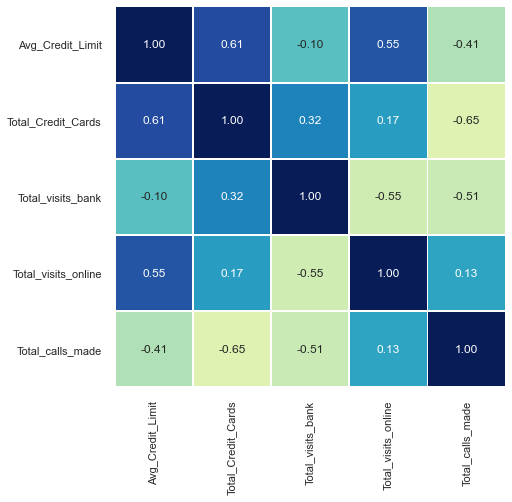

<IPython.core.display.Javascript object>

In [20]:
sns.set(rc={"figure.figsize": (7, 7)})
sns.heatmap(
    data=df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

#### Observations

- There is a moderate correlation between Average Credit Limit with Total Credit Cards and Total visits online.
- There is a negative correlation between Total calls made with Total visits bank and Total credit cards.
- There is a negative correlation between Total visits to the bank and visit online.

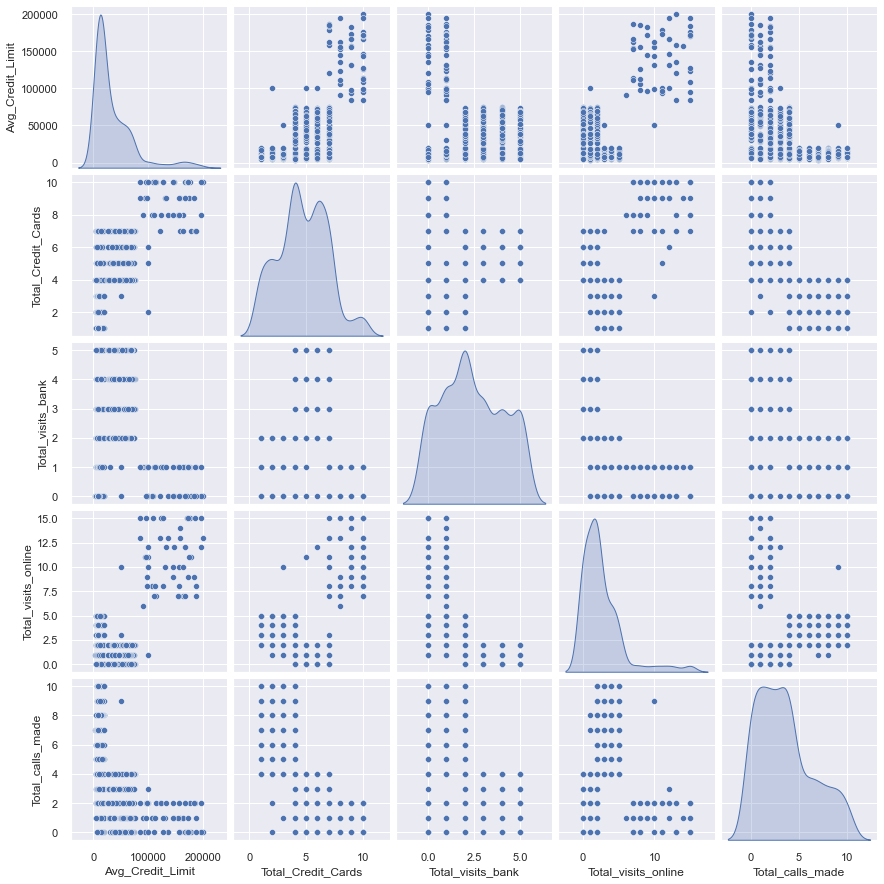

<IPython.core.display.Javascript object>

In [21]:
sns.pairplot(
    data=df,
    diag_kind="kde",
)
plt.show()

#### Observations

- From the plot Average credit limit is showing a tentative segmentation of two groups, where at higher credit limit(around 100K), less visit to the bank, more visit to the web site and less personal visits to the bank and more credit cards holding per customer.
- As should be expected from the negative correlation less visits to the bank means more visits online and more phone calls.

### Scaling the Dataset

In [22]:
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

<IPython.core.display.Javascript object>

In [23]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [24]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

### K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9430843103448057
Number of Clusters: 7 	Average Distortion: 0.9095846521660791
Number of Clusters: 8 	Average Distortion: 0.8894301062409727


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

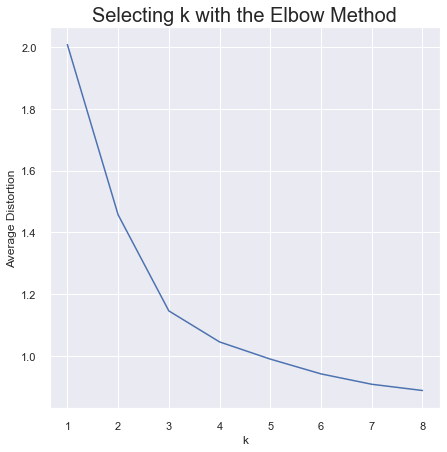

<IPython.core.display.Javascript object>

In [25]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

- The appropriate value of k from the elbow curve seems to be 3 or 2.

#### Silhouette Scores

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.25545029453623114
For n_clusters = 7, silhouette score is 0.24813898838486073
For n_clusters = 8, silhouette score is 0.22743348949623682
For n_clusters = 9, silhouette score is 0.218120383207942


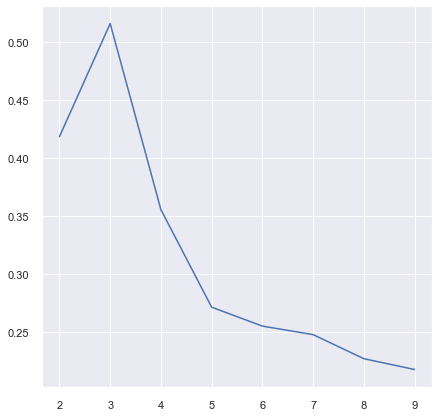

<IPython.core.display.Javascript object>

In [26]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

- From the silhouette scores, it seems that 3 is a good value of k.

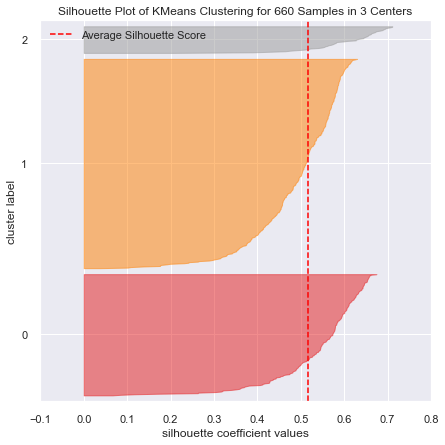

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [27]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

In [29]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [30]:
cluster_profile = df.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [31]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [32]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

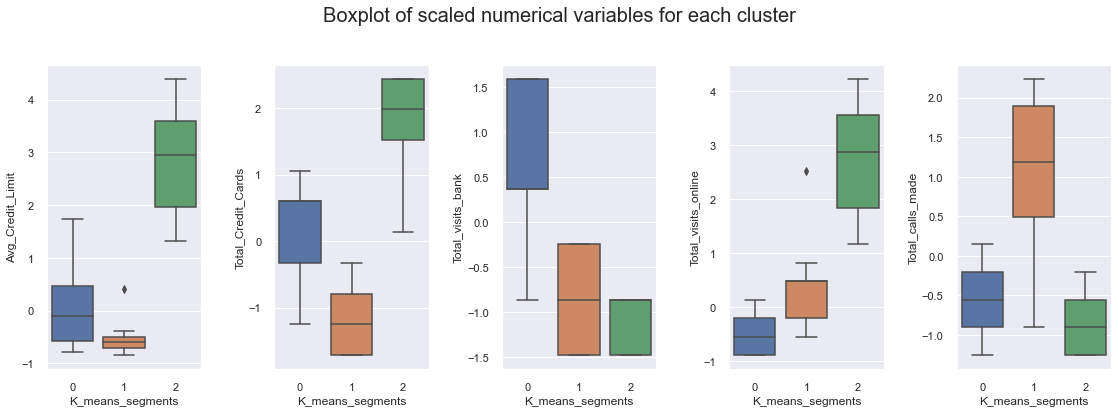

<IPython.core.display.Javascript object>

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

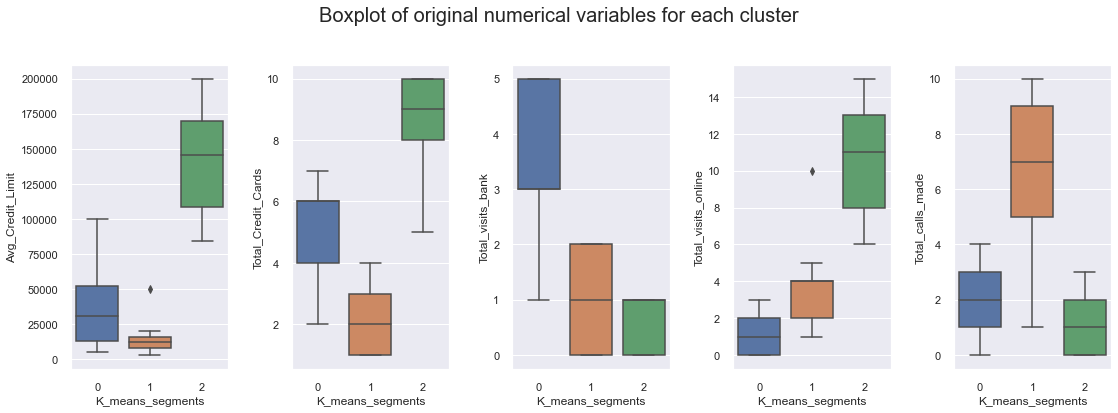

<IPython.core.display.Javascript object>

In [34]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

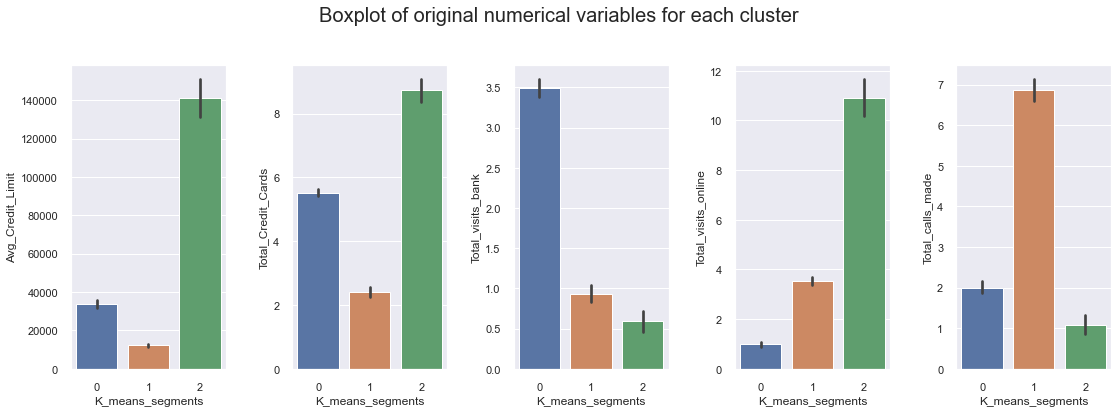

<IPython.core.display.Javascript object>

In [35]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.barplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

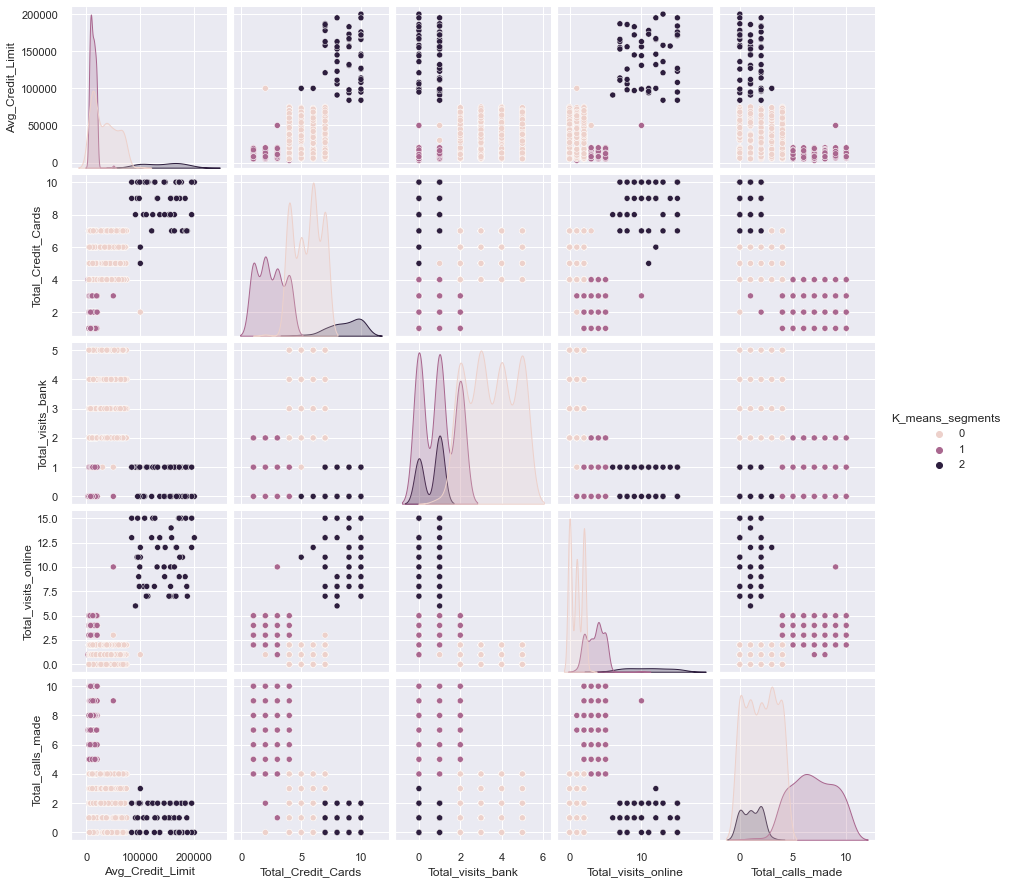

<IPython.core.display.Javascript object>

In [36]:
sns.pairplot(data=df, hue="K_means_segments")

In [37]:
cluster0 = df[df["K_means_segments"] == 0]
cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,386.000,33782.383,22169.461,5000.000,13000.000,31000.000,52000.000,100000.000
Total_Credit_Cards,386.000,5.516,1.140,2.000,4.000,6.000,6.000,7.000
Total_visits_bank,386.000,3.490,1.136,1.000,3.000,3.000,5.000,5.000
Total_visits_online,386.000,0.982,0.857,0.000,0.000,1.000,2.000,3.000
Total_calls_made,386.000,2.000,1.431,0.000,1.000,2.000,3.000,4.000
K_means_segments,386.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<IPython.core.display.Javascript object>

In [38]:
cluster1 = df[df["K_means_segments"] == 1]
cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,224.000,12174.107,5249.049,3000.000,8000.000,12000.000,16000.000,50000.000
Total_Credit_Cards,224.000,2.411,1.101,1.000,1.000,2.000,3.000,4.000
Total_visits_bank,224.000,0.933,0.804,0.000,0.000,1.000,2.000,2.000
Total_visits_online,224.000,3.554,1.219,1.000,2.000,4.000,4.000,10.000
Total_calls_made,224.000,6.871,1.990,1.000,5.000,7.000,9.000,10.000
K_means_segments,224.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [39]:
cluster2 = df[df["K_means_segments"] == 2]
cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.000,141040.000,34457.877,84000.000,108750.000,145500.000,170000.000,200000.000
Total_Credit_Cards,50.000,8.740,1.275,5.000,8.000,9.000,10.000,10.000
Total_visits_bank,50.000,0.600,0.495,0.000,0.000,1.000,1.000,1.000
Total_visits_online,50.000,10.900,2.880,6.000,8.000,11.000,13.000,15.000
Total_calls_made,50.000,1.080,0.877,0.000,0.000,1.000,2.000,3.000
K_means_segments,50.000,2.000,0.000,2.000,2.000,2.000,2.000,2.000


<IPython.core.display.Javascript object>

### Insights

#### - Cluster 0:

- Cluster 0 contains the biggest group of customers with similarities 386 out of the 660, which is 58%.
- The average credit card limit is 33782 and the maximum 100000.
- The customers hold from 2 to 7 credit cards at the time. On an average they hold 5.5 credit cards above of the total average. 
- The customers in cluster 0 tend to go to the bank in person the most compare with the other clusters. At least they go one time to five times a year.
- The customers in cluster 0 are ones who visit the bank website, way below the total average, The scatter plot shows at lot of credit card holders that don't visit the website not even once. The average of visit is once a year and the maximum  of 3 times per year.
- The customers in cluster 0 call the bank on average twice a year, it is below the average, how ever pairplot is showing at lot of customers that dont call not even once.  From the boxplot, the call from this group could be ranked in intermediate level.

#### - Cluster 1:

- Cluster 1 the second biggest group of customers with similarities 224 out of the 660, which is 34%.
- The average credit card limit is 12174 and the maximum 50000. The average is below the total average.
- Cluster 1, is the group that holds the least number of credit cards by customer. They hold from 1 to 4 and on average around 2.
- Cluster 1 customers doesn't go to the bank very often, most of the people don't go to the bank at all. So from this group, people could go to the bank from 0 to twice a year and on average, once a year is the average
- The customers in cluster 1 are ones who visit the  the bank website from 1 to 10 times a year, above the total average. The average of visit is around 3-4 times a year.
- The customers in cluster 1 are the ones who call the most among the other clusters, minimum once, maximum ten times ayear and on average around 7 times.

#### - Cluster 2:

- Cluster 2 contains the smallest group of customers with similarities 50 out of the 660, which is 7.57%.
- The average credit card limit is 141040 and the maximum 200000, this is the highest credit limit average among all groups and also, to this group belongs all the outliers from the data.
- The customers hold from 5 to 10 credit cards at the time. On an average they hold 8.7 credit cards above of the total average. Cluster 2 is the one with a greater number of credit cards per holder.
- Cluster 2 customers doesnt go to the bank very often, most of the people don't go to the bank at all. So from this group, people could go to the bank from 0 to once a year and on average, less than once a year is the average
- The customers in cluster 2 are ones who visit the  the bank website the most, from 6 to 15 times a year, way above the total average. The average of visit is around 10-11 times a year.
- The customers in cluster 2 are the ones who call the least among the other clusters, from 0 to 3 times a year and on average around 1 call yearly.


### Hierarchical Clustering

In [40]:
# scaling the dataset before clustering
scaler2 = StandardScaler()
subset = df[num_col].copy()
subset_scaled2 = scaler2.fit_transform(subset)

<IPython.core.display.Javascript object>

In [41]:
# creating a dataframe of the scaled columns
subset_scaled_df2 = pd.DataFrame(subset_scaled2, columns=subset.columns)

<IPython.core.display.Javascript object>

In [42]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df2, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df2))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553608.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875372.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042138.
Cophenetic co

<IPython.core.display.Javascript object>

In [43]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

### Let's explore different linkage methods with Euclidean distance only.

In [44]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df2))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8628640660606482.
Cophenetic correlation for complete linkage is 0.8665555201004784.
Cophenetic correlation for average linkage is 0.8973108314396828.
Cophenetic correlation for centroid linkage is 0.8928515286188841.
Cophenetic correlation for ward linkage is 0.7518412339232365.
Cophenetic correlation for weighted linkage is 0.8946732239283419.


<IPython.core.display.Javascript object>

In [45]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8973108314396828, which is obtained with average linkage.


<IPython.core.display.Javascript object>

#### Observations

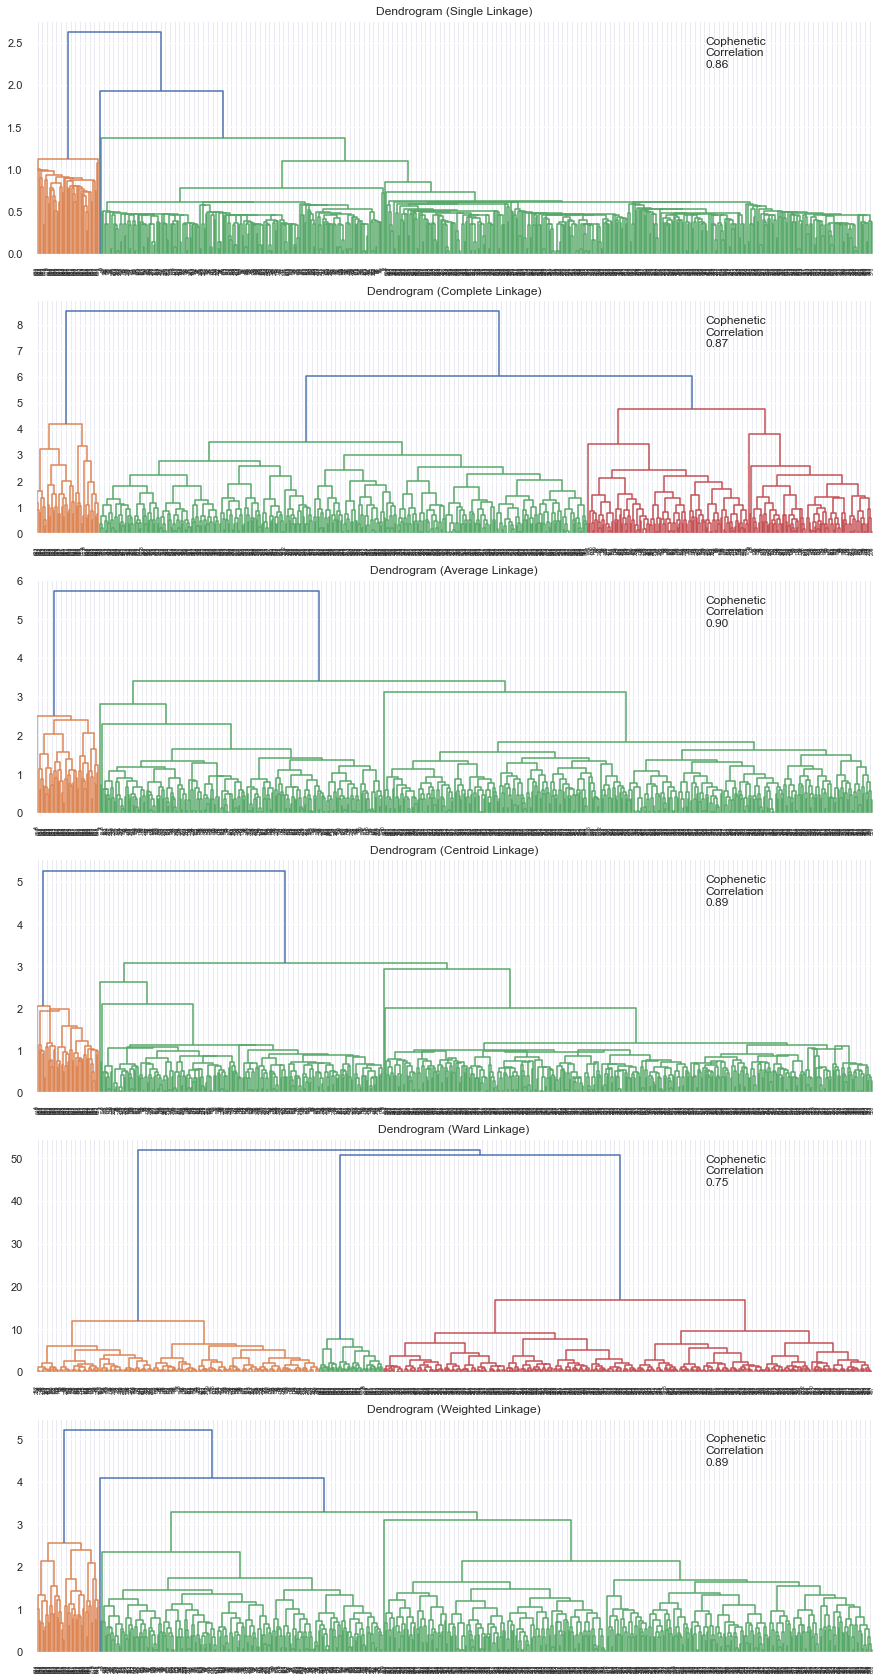

<IPython.core.display.Javascript object>

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(
        subset_scaled_df,
        metric="euclidean",
        method=method,
    )

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df2))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])

#### Observation

- Dendrogram for Ward linkage shows distinct and separate clusters but cophenetic correlation is less

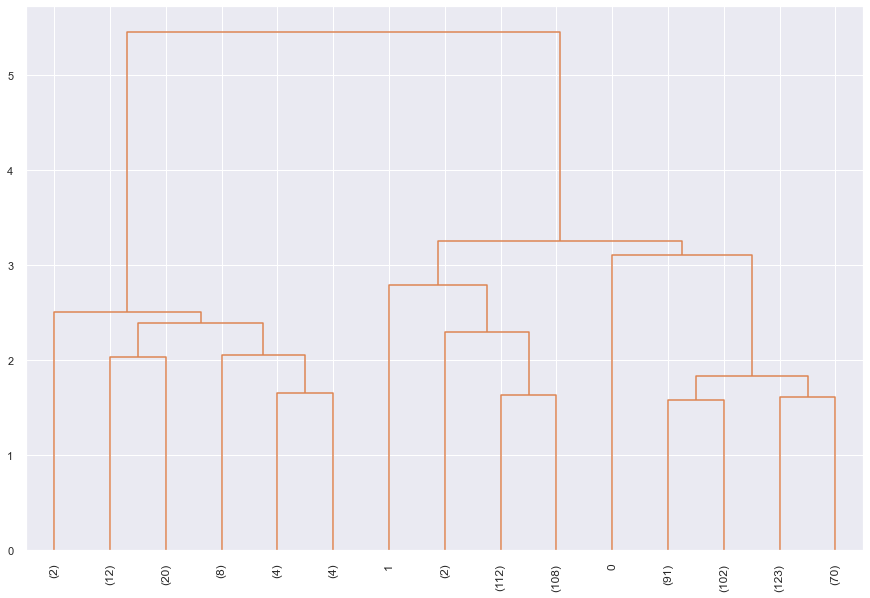

<IPython.core.display.Javascript object>

In [48]:
Z = linkage(
    subset_scaled_df2,
    metric="euclidean",
    method="average",
)
c, coph_dists = cophenet(Z, pdist(subset_scaled_df2))
plt.figure(figsize=(15, 10))

dendrogram(
    Z,
    p=15,
    truncate_mode="lastp",
    leaf_rotation=90.0,
    color_threshold=40,
    leaf_font_size=12.0,
)
plt.show()

In [49]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.863
1,complete,0.867
2,average,0.897
3,centroid,0.893
4,ward,0.752
5,weighted,0.895


<IPython.core.display.Javascript object>

##### Let's see the dendrogram for Chebyshev and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).

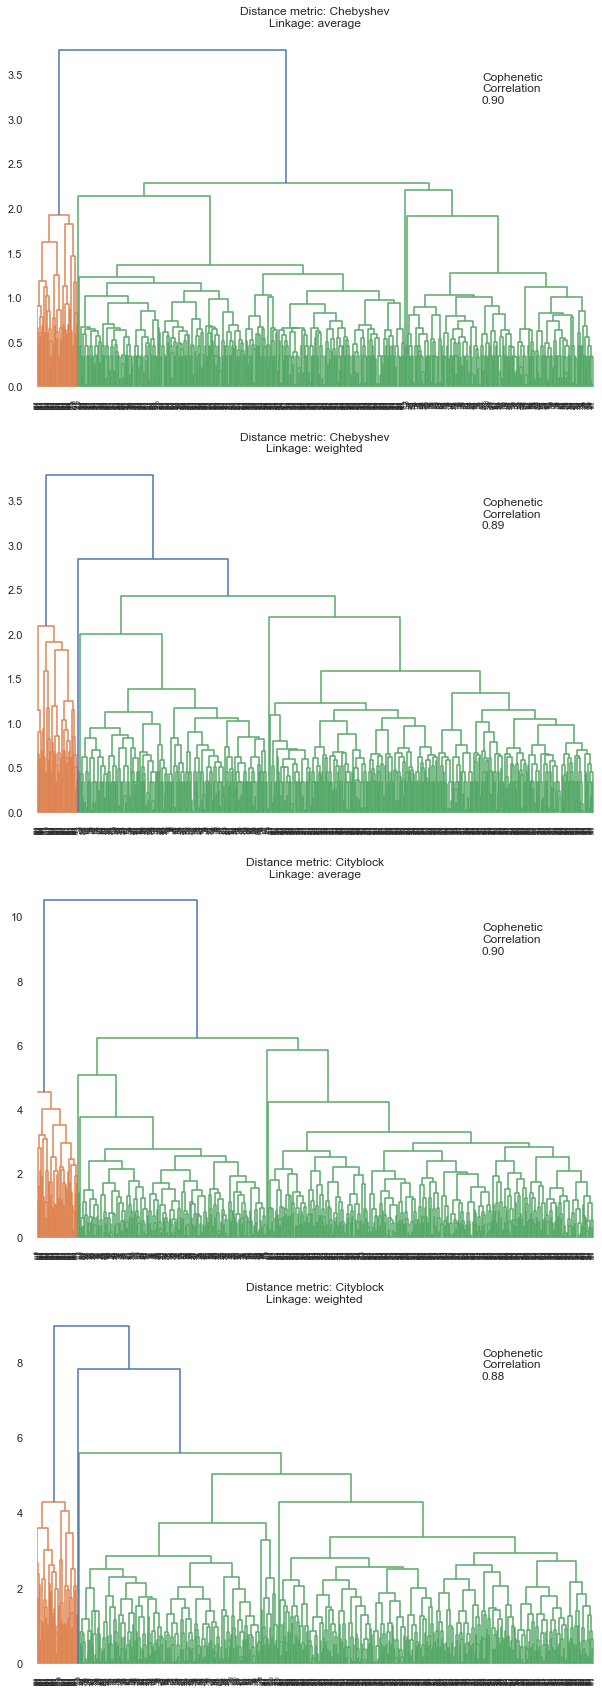

<IPython.core.display.Javascript object>

In [50]:
# list of distance metrics
distance_metrics = ["chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df2, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df2))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

#### Observations

- Out of all the dendrograms we saw, it is clear that the dendrogram with Ward linkage gave us separate and distinct clusters.
- 3 would be the appropriate number of the clusters from the dendrogram with Ward linkage method.
- However based on the Cophenetic correlation score, the chosen metyhod will be average linkage with Euclidian distance, agglomerative method!

In [51]:
HCmodel = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df2)

AgglomerativeClustering(linkage='average')

<IPython.core.display.Javascript object>

In [52]:
subset_scaled_df2["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling

In [53]:
cluster_profile = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [54]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [55]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,25847.540984,4.375410,2.550820,1.926230,3.788525,0.367213,610
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50


<IPython.core.display.Javascript object>

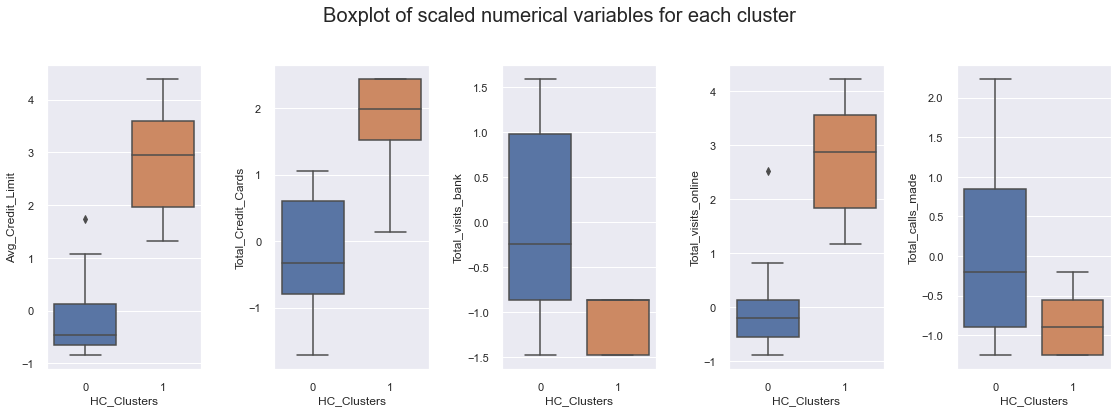

<IPython.core.display.Javascript object>

In [56]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df2[num_col[counter]],
        x=subset_scaled_df2["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

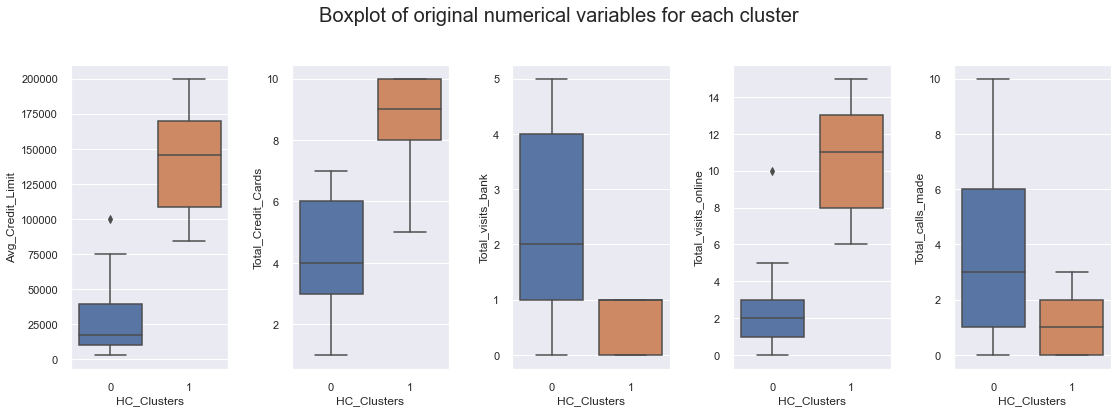

<IPython.core.display.Javascript object>

In [57]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

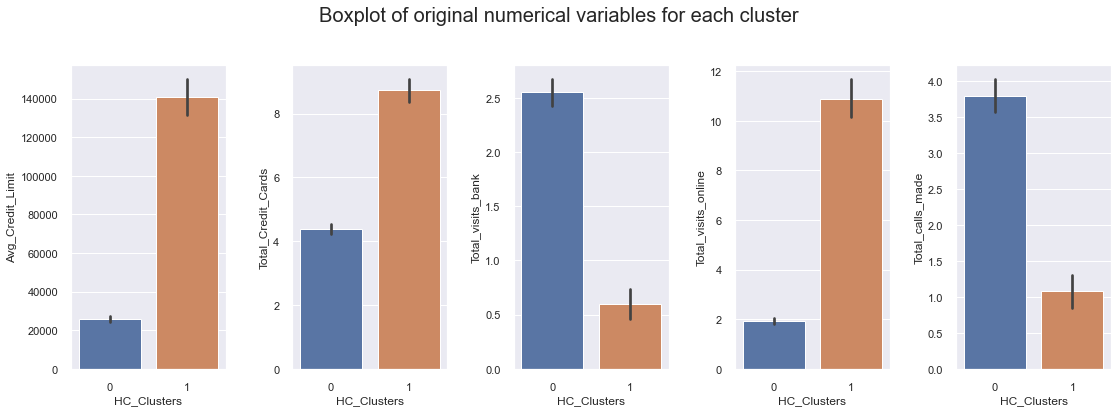

<IPython.core.display.Javascript object>

In [61]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.barplot(ax=axes[ii], y=df[num_col[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [62]:
df.drop("K_means_segments", axis=1, inplace=True)

<IPython.core.display.Javascript object>

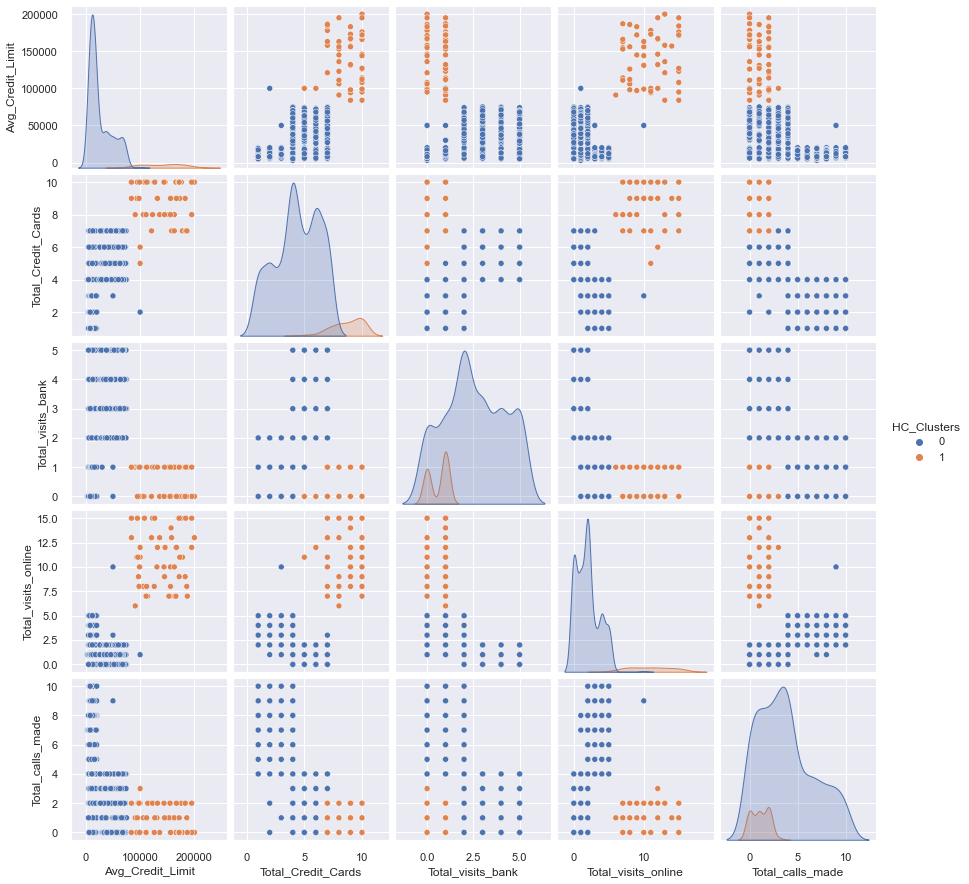

<IPython.core.display.Javascript object>

In [64]:
sns.pairplot(data=df, hue="HC_Clusters")

In [65]:
hc_cluster0 = df[df["HC_Clusters"] == 0]
hc_cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,610.000,25847.541,20723.721,3000.000,10000.000,17000.000,39000.000,100000.000
Total_Credit_Cards,610.000,4.375,1.873,1.000,3.000,4.000,6.000,7.000
Total_visits_bank,610.000,2.551,1.604,0.000,1.000,2.000,4.000,5.000
Total_visits_online,610.000,1.926,1.596,0.000,1.000,2.000,3.000,10.000
Total_calls_made,610.000,3.789,2.875,0.000,1.000,3.000,6.000,10.000
HC_Clusters,610.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<IPython.core.display.Javascript object>

In [66]:
hc_cluster1 = df[df["HC_Clusters"] == 1]
hc_cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,50.000,141040.000,34457.877,84000.000,108750.000,145500.000,170000.000,200000.000
Total_Credit_Cards,50.000,8.740,1.275,5.000,8.000,9.000,10.000,10.000
Total_visits_bank,50.000,0.600,0.495,0.000,0.000,1.000,1.000,1.000
Total_visits_online,50.000,10.900,2.880,6.000,8.000,11.000,13.000,15.000
Total_calls_made,50.000,1.080,0.877,0.000,0.000,1.000,2.000,3.000
HC_Clusters,50.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

####  Observations

##### - Cluster 0:

- Cluster 0 contains the biggest group of customers with similarities 610 out of the 660, which is 92.43%.
- The average credit card limit is 25847 and the maximum 100000.
- The customers hold from 1 to 7 credit cards at the time. On an average they hold 4 or 5 credit cards.
- The customers in cluster 0 tend to go to the bank in person the most compare with the other clusters. At least they go one time to five times a year.
- The customers in cluster 0 are ones who visit the bank website the least. The average of visit is around twice a year and the maximum of 10 times per year.
- The customers in cluster 0 call the bank on average 3-4 times a year, this cluster is the one that call the most.

##### - Cluster 1:

- Cluster 1 contains the smallest group of customers with similarities 50 out of the 660, which is 7.57%.
- The average credit card limit is 141040 and the maximum 200000, this is the highest credit limit average cluster, to this group belongs all the outliers from the data.
- The customers hold from 5 to 10 credit cards at the time. On an average they hold 8.7 credit cards above of the total average. Cluster 1 is the one with a greater number of credit cards per holder.
- Cluster 1 customers doesnt go to the bank very often, most of the people don't go to the bank at all. So from this group, people could go to the bank from 0 to once a year and on average, less than once a year is the average
- The customers in cluster 1 are ones who visit the the bank website the most, from 6 to 15 times a year, way above the total average. The average of visit is around 10-11 times a year.
- The customers in cluster 1 are the ones who call the least among the other clusters, from 0 to 3 times a year and on average around once call yearly.

### Business Recommendations and conclusions

- K-clusters splits the customer essentially in online (cluster 2), calls (cluster 1) and in person banking (cluster 0). Where online people show to hold a greater number of credit cards and higher credit limit on average, calls people show to hold the least credit cards and the lowest credit card limit, in person banking have a fair number of credit cards and fair credit card limit.

- Hierarchical Clustering split the data in 2 clusters online (cluster 1) and calls/in person (cluster 0). Where online people show to hold a greater number of credit cards and higher credit limit on average. calls/in person hold a smaller number of cards and prefer this way of communication with the bank.

- Cluster 1 for Hierarchical and Cluster 2 for K-clustering contain the same features a similarities.
 
- K-clustering would be the best choice for clustering for this strategy since it makes the difference between in person and calls.

- For Cluster 0 for k-clustering, marketing campaign should be focus on education, their credit card limit average is high enough and they hold enough amount of credit cards, to learn about the benefit to banking online, bank should start approaching them and show how rewards and cash back work for their advantage, also by educating customers to access online will benefit the bank financially.

- For Cluster 1 for k-clustering, would be more sensitive to phone calls, the marketing campaign should be focus in sending text message or alerts about the bank offers, and again work with the customer in getting into the habit to visit the online site and get rewards by doing that and save money, since transactions thru phone normally have a fee included. Also, by educating customers to access online will benefit the bank financially.

- Cluster 2 for K-clustering, also Cluster 1 for Hierarchical clustering, could be called a premium target that holds the largest amount on credit limit and number credit cards, so the marketing campaign should be focus on online offers, where they can visualize the advantage and benefits provided by the bank. This cluster probably are more into online banking services because the like to enjoy the cash back and rewards advantage that offer high credit limits and numerous credit cards.

